# 1. Carga de bibliotetas

Seccion para instalar e importar bibliotecas necesarias

In [35]:
# Dependencias
!pip install fitter
!pip install thinc --upgrade
!pip install numpy==1.25.2

  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fitter 1.7.1 requires numpy<2.0.0,>=1.20.0, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
spacy 3.8.5 requires thinc<8.4.0,>=8.3.4, but you have thinc 9.1.1 which is incompatible.
  Using cached numpy-1.25.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using

In [4]:
# Importar dependencias
from fitter import Fitter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import random
from datetime import datetime, timedelta
from scipy.stats import gamma, weibull_min, expon, lognorm, beta

ModuleNotFoundError: No module named 'ace_tools'

In [9]:
# Montar gogle drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# 2. Importar Datos

In [10]:
# Leer archivo
bookings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/hotel_bookings.csv')

# 3. Análisis Exploratorio de Datos

In [11]:
# Tipo de dato de la variable
type(bookings)

pandas.core.frame.DataFrame

In [12]:
# Primeras lineas del dataframe
bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [13]:
# Nombres de las columnas en formato lista
bookings.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [14]:
# Dimensionalidad del dataframe
bookings.shape

(119390, 32)

In [15]:
# El tipo de dato de cada una de las columnas
bookings.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


# 4. Preparación de Datos



In [94]:
# Diccionario para mapear meses
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Crear mes de arribo en valores numericos
bookings['arrival_date_month_int'] = bookings['arrival_date_month'].map(month_mapping).astype('int64')

# Crear fecha de arribo
bookings['arrival_date_dt'] = pd.to_datetime(bookings['arrival_date_year'].astype(str) + '-' + bookings['arrival_date_month_int'].astype(str) + '-' + bookings['arrival_date_day_of_month'].astype(str))
bookings['arrival_date_timestamp'] = bookings['arrival_date_dt'].astype(np.int64) // 10**9

# Construir los timestamps de llegada (sin hora específica, solo fechas)
bookings['arrival_date_dt2'] = pd.to_datetime({
    'year': bookings['arrival_date_year'],
    'month': bookings['arrival_date_month_int'],
    'day': bookings['arrival_date_day_of_month']
})

In [95]:
# Crear dias totales de reserva
bookings['stays_total'] = bookings['stays_in_weekend_nights'] + bookings['stays_in_week_nights']

In [96]:
# Crear fecha de salida
bookings['departure_date_dt'] = bookings['arrival_date_dt'] + bookings['stays_total'].apply(pd.Timedelta, unit='D')

In [97]:
# Transformar el tipo de Habitacion
# A -> Doble
# D -> Simple
# Otros valores -> Suite
def transform_room_type(room_type):
  if room_type == 'A':
    return 'Doble'
  elif room_type == 'D':
    return 'Simple'
  else:
    return 'Suite'

bookings['room_type_tr'] = bookings['reserved_room_type'].apply(transform_room_type)

In [98]:
bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_month_int,arrival_date_dt,arrival_date_timestamp,arrival_date_dt2,stays_total,departure_date_dt,room_type_tr
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Check-Out,2015-07-01,7,2015-07-01,1435708800,2015-07-01,0,2015-07-01,Suite
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Check-Out,2015-07-01,7,2015-07-01,1435708800,2015-07-01,0,2015-07-01,Suite
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Check-Out,2015-07-02,7,2015-07-01,1435708800,2015-07-01,1,2015-07-02,Doble
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Check-Out,2015-07-02,7,2015-07-01,1435708800,2015-07-01,1,2015-07-02,Doble
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,1,Check-Out,2015-07-03,7,2015-07-01,1435708800,2015-07-01,2,2015-07-03,Doble


In [99]:
# Registros con reservas canceladas
bookings['is_canceled'].value_counts()

,count
is_canceled,
0,75166
1,44224


In [100]:
# Registros para el City Hotel
bookings['hotel'].value_counts()

,count
hotel,
City Hotel,79330
Resort Hotel,40060


In [101]:
# Creo un nuevo dataframe con los registros para City Hotel descartando las reservas canceladas
bookings_city_hotel = bookings[(bookings['hotel'] == 'City Hotel') & (bookings['is_canceled'] == 0)]
bookings_city_hotel.shape

(46228, 39)

In [102]:
yearly_dataframes = {}

# Obtener los años de arribos
unique_years = bookings_city_hotel['arrival_date_year'].unique()

# Crear un dataframe para cada año
for year in unique_years:
  print(year)
  # Filtrar por el año actual
  yearly_data = bookings_city_hotel[bookings_city_hotel['arrival_date_year'] == year]
  # Guardar en un diccionario de dataframes
  yearly_dataframes[year] = yearly_data

2015
2016
2017


In [103]:
yearly_dataframes[2017].shape

(15817, 39)

array([[<Axes: title={'center': 'arrival_date_timestamp'}>]], dtype=object)

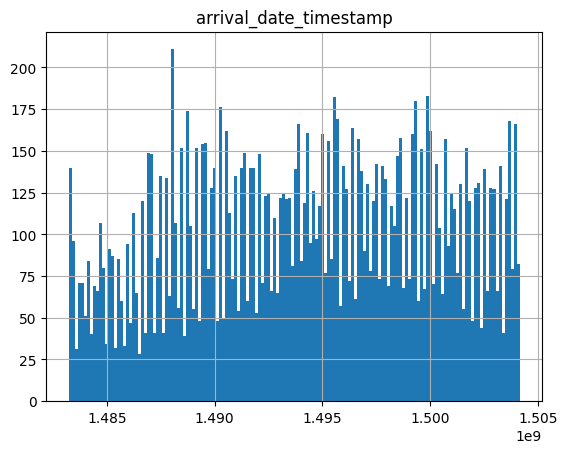

In [104]:
yearly_dataframes[2017].hist('arrival_date_timestamp', bins=150)

### 4.1. Arribo de Huéspedes

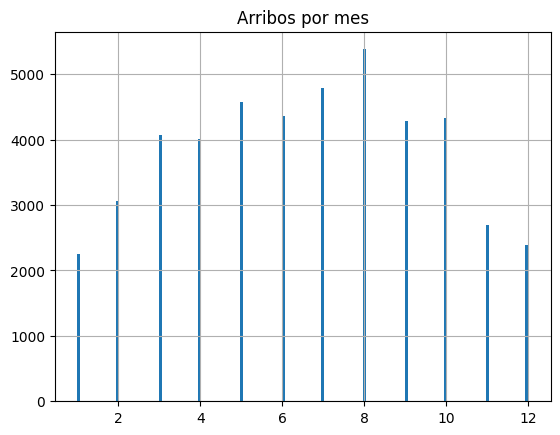

In [105]:
# Histograma para arribo de los huéspedes
bookings_city_hotel.hist('arrival_date_month_int', bins=150)
plt.title('Arribos por mes')
plt.show()

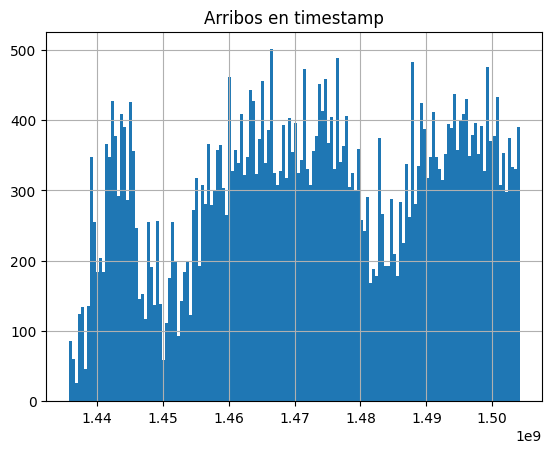

In [106]:
# Histograma para arribo de los huéspedes
bookings_city_hotel.hist('arrival_date_timestamp', bins=150)
plt.title('Arribos en timestamp')
plt.show()

In [107]:
# El método describe() me brinda los estadísticos principales de una columna
bookings_city_hotel['arrival_date_timestamp'].describe()

,arrival_date_timestamp
count,4.622800e+04
mean,1.473004e+09
std,1.884546e+07
min,1.435709e+09
25%,1.458778e+09
50%,1.473206e+09
75%,1.489968e+09
max,1.504138e+09


In [108]:
# Ordenar por fecha de arribo
bookings_sorted_arrivals= bookings_city_hotel.sort_values('arrival_date_dt2')

# Calcular las diferencias en minutos entre fechas de arribo sucesivas
arrival_timestamps = bookings_sorted_arrivals['arrival_date_dt2'].astype(np.int64) // 10**9  # convertir a segundos
intervals_sec = np.diff(arrival_timestamps)
intervals_min = intervals_sec / 60  # convertir a minutos

# Estadísticas básicas
intervals_mean = np.mean(intervals_min)
intervals_median = np.median(intervals_min)
min_interval = np.min(intervals_min)
max_interval = np.max(intervals_min)

intervals_min[:10], intervals_mean, intervals_median, min_interval, max_interval


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 24.671295995846585,
 0.0,
 0.0,
 2880.0)

In [109]:
# Paso 1: Calcular cantidad de reservas por día
reservas_por_dia = bookings_sorted_arrivals.groupby('arrival_date_dt2').size()

# Paso 2: Agregar la columna 'mes' para capturar estacionalidad
reservas_por_dia = reservas_por_dia.rename('n_arribos').reset_index()
reservas_por_dia['mes'] = reservas_por_dia['arrival_date_dt2'].dt.month

# Paso 3: Agrupar por mes y obtener distribución empírica de arribos diarios
# (frecuencia relativa de cantidad de arribos por día en cada mes)
distribuciones_por_mes = (
    reservas_por_dia
    .groupby('mes')['n_arribos']
    .value_counts(normalize=True)
    .rename('frecuencia')
    .reset_index()
)

# # Distribución de arribos diarios
# enero = distribuciones_por_mes[distribuciones_por_mes['mes'] == 1]

# plt.figure(figsize=(10, 4))
# sns.barplot(data=enero, x='n_arribos', y='frecuencia')
# plt.title("Distribución de arribos diarios en Enero")
# plt.xlabel("Cantidad de reservas en un día")
# plt.ylabel("Frecuencia relativa")
# plt.tight_layout()
# plt.show()

# # Distribución de arribos diarios
# febrero = distribuciones_por_mes[distribuciones_por_mes['mes'] == 2]

# plt.figure(figsize=(10, 4))
# sns.barplot(data=febrero, x='n_arribos', y='frecuencia')
# plt.title("Distribución de arribos diarios en Febrero")
# plt.xlabel("Cantidad de reservas en un día")
# plt.ylabel("Frecuencia relativa")
# plt.tight_layout()
# plt.show()

# # Distribución de arribos diarios
# marzo = distribuciones_por_mes[distribuciones_por_mes['mes'] == 3]

# plt.figure(figsize=(10, 4))
# sns.barplot(data=marzo, x='n_arribos', y='frecuencia')
# plt.title("Distribución de arribos diarios en Marzo")
# plt.xlabel("Cantidad de reservas en un día")
# plt.ylabel("Frecuencia relativa")
# plt.tight_layout()
# plt.show()

# # Distribución de arribos diarios
# abril = distribuciones_por_mes[distribuciones_por_mes['mes'] == 4]

# plt.figure(figsize=(10, 4))
# sns.barplot(data=abril, x='n_arribos', y='frecuencia')
# plt.title("Distribución de arribos diarios en Abril")
# plt.xlabel("Cantidad de reservas en un día")
# plt.ylabel("Frecuencia relativa")
# plt.tight_layout()
# plt.show()

# # Distribución de arribos diarios
# mayo = distribuciones_por_mes[distribuciones_por_mes['mes'] == 5]

# plt.figure(figsize=(10, 4))
# sns.barplot(data=mayo, x='n_arribos', y='frecuencia')
# plt.title("Distribución de arribos diarios en Mayo")
# plt.xlabel("Cantidad de reservas en un día")
# plt.ylabel("Frecuencia relativa")
# plt.tight_layout()
# plt.show()

# # Distribución de arribos diarios
# junio = distribuciones_por_mes[distribuciones_por_mes['mes'] == 6]

# plt.figure(figsize=(10, 4))
# sns.barplot(data=junio, x='n_arribos', y='frecuencia')
# plt.title("Distribución de arribos diarios en Junio")
# plt.xlabel("Cantidad de reservas en un día")
# plt.ylabel("Frecuencia relativa")
# plt.tight_layout()
# plt.show()

# # Distribución de arribos diarios
# julio = distribuciones_por_mes[distribuciones_por_mes['mes'] == 7]

# plt.figure(figsize=(10, 4))
# sns.barplot(data=julio, x='n_arribos', y='frecuencia')
# plt.title("Distribución de arribos diarios en Julio")
# plt.xlabel("Cantidad de reservas en un día")
# plt.ylabel("Frecuencia relativa")
# plt.tight_layout()
# plt.show()

# # Distribución de arribos diarios
# agosto = distribuciones_por_mes[distribuciones_por_mes['mes'] == 8]

# plt.figure(figsize=(10, 4))
# sns.barplot(data=agosto, x='n_arribos', y='frecuencia')
# plt.title("Distribución de arribos diarios en Agosto")
# plt.xlabel("Cantidad de reservas en un día")
# plt.ylabel("Frecuencia relativa")
# plt.tight_layout()
# plt.show()

# # Distribución de arribos diarios
# septiembre = distribuciones_por_mes[distribuciones_por_mes['mes'] == 9]

# plt.figure(figsize=(10, 4))
# sns.barplot(data=septiembre, x='n_arribos', y='frecuencia')
# plt.title("Distribución de arribos diarios en Septiembre")
# plt.xlabel("Cantidad de reservas en un día")
# plt.ylabel("Frecuencia relativa")
# plt.tight_layout()
# plt.show()

# # Distribución de arribos diarios
# octubre = distribuciones_por_mes[distribuciones_por_mes['mes'] == 10]

# plt.figure(figsize=(10, 4))
# sns.barplot(data=octubre, x='n_arribos', y='frecuencia')
# plt.title("Distribución de arribos diarios en Octubre")
# plt.xlabel("Cantidad de reservas en un día")
# plt.ylabel("Frecuencia relativa")
# plt.tight_layout()
# plt.show()

# # Distribución de arribos diarios
# noviembre = distribuciones_por_mes[distribuciones_por_mes['mes'] == 11]

# plt.figure(figsize=(10, 4))
# sns.barplot(data=noviembre, x='n_arribos', y='frecuencia')
# plt.title("Distribución de arribos diarios en Noviembre")
# plt.xlabel("Cantidad de reservas en un día")
# plt.ylabel("Frecuencia relativa")
# plt.tight_layout()
# plt.show()

# # Distribución de arribos diarios
# diciembre = distribuciones_por_mes[distribuciones_por_mes['mes'] == 12]

# plt.figure(figsize=(10, 4))
# sns.barplot(data=diciembre, x='n_arribos', y='frecuencia')
# plt.title("Distribución de arribos diarios en Diciembre")
# plt.xlabel("Cantidad de reservas en un día")
# plt.ylabel("Frecuencia relativa")
# plt.tight_layout()
# plt.show()

### 4.2. Duración de la estadia

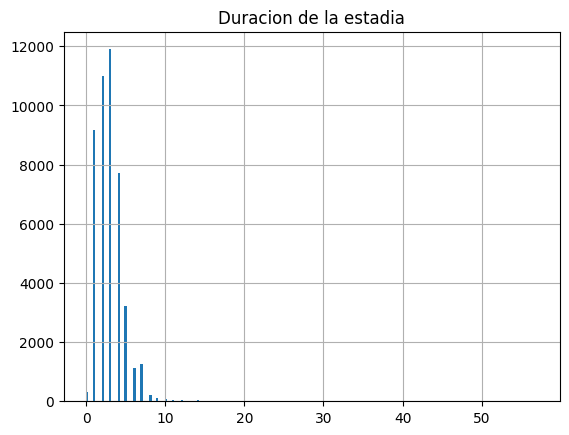

In [110]:
# Histograma para Duración de la estadia
bookings_city_hotel.hist('stays_total', bins=200)
plt.title('Duracion de la estadia')
plt.show()

In [111]:
# Creo un nuevo dataframe con los registros dentro de los 10 dias para eliminar datos anomalos
bookings_city_hotel_stays = bookings_city_hotel[(bookings_city_hotel['stays_total'] > 0) & (bookings_city_hotel['stays_total'] < 8)]

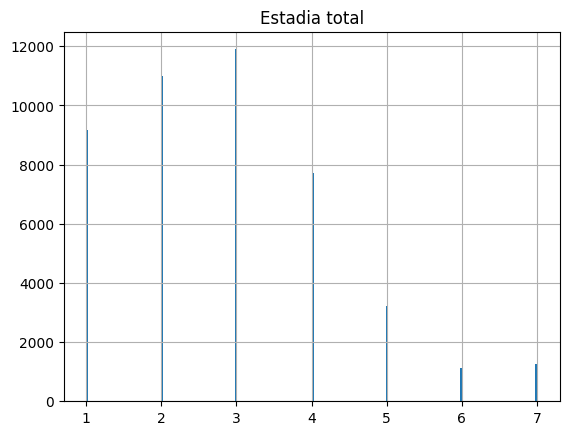

In [112]:
bookings_city_hotel_stays.hist('stays_total', bins=200)
plt.title('Estadia total')
plt.show()

In [113]:
# El método describe() me brinda los estadísticos principales de una columna
bookings_city_hotel_stays['stays_total'].describe()

,stays_total
count,45348.000000
mean,2.849343
std,1.464713
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,7.000000


### 4.3. Tipo de Habitación

In [114]:
# Calcular el porcentaje de cada tipo de Habitación
bookings_city_hotel['room_type_tr'].value_counts(normalize=True) * 100

,proportion
room_type_tr,
Doble,76.462317
Simple,16.485680
Suite,7.052003


Se descarta calcular una fdp

### 4.4. Cantidad de Bebes en la Reserva

In [115]:
# Calcular el porcentaje de bebes en las reservas
bookings_city_hotel['babies'].value_counts(normalize=True) * 100


,proportion
babies,
0,99.340227
1,0.642468
2,0.012979
10,0.002163
9,0.002163


Se descarta calcular una fdp

### 4.5. Cantidad de niños en la Reserva

In [116]:
# Calcular el porcentaje de niños en las reservas
bookings_city_hotel['children'].value_counts(normalize=True) * 100


,proportion
children,
0.0,92.874448
1.0,4.356667
2.0,2.673704
3.0,0.095180


Se descarta calcular una fdp

# 5. Cálculo de FDPS

### 5.1. Arribo de Huéspedes (Descartado)

In [117]:
# Preparar la columna del dataframe que se quiere ajustar
fdp_city_hotel_arrives = Fitter(bookings_city_hotel.arrival_date_month_int)

##### 2015

In [118]:
# Preparar la columna del dataframe que se quiere ajustar
fdp_city_hotel_arrives_2015 = Fitter(yearly_dataframes[2015].arrival_date_timestamp)

In [119]:
# Con el método fit() ajusta mis datos a las 80 distribuciones de SciPy
fdp_city_hotel_arrives_2015.fit()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
vonmises_line,1.117625e-13,3338.403267,3359.241610,0.192583,0.048704,2.880690e-16
nakagami,1.179576e-13,3366.508895,3387.347238,0.179959,0.040799,1.529764e-11
powernorm,1.182059e-13,3366.915205,3387.753548,0.179900,0.041585,5.647295e-12
maxwell,1.186764e-13,3362.367739,3376.259967,0.183941,0.042977,9.252130e-13
pearson3,1.188455e-13,3367.689388,3388.527731,0.180551,0.043489,4.684184e-13


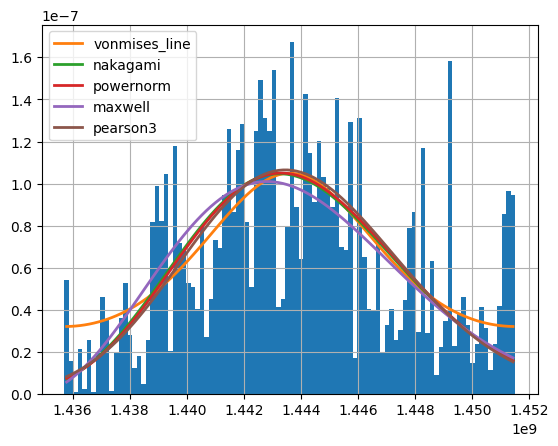

In [120]:
# Summary me muestra el resumen de los mejores ajustes
fdp_city_hotel_arrives_2015.summary(5)

In [121]:
# get_best me devuelve la mejor distribución de acuerdo al criterio que le indico y sus parámetros
fdp_city_hotel_arrives_2015.get_best(method='sumsquare_error')

{'vonmises_line': {'kappa': 0.5920659353977178,
  'loc': 1443614402.5212445,
  'scale': 2516431.528978723}}

In [122]:
fdp_city_hotel_arrives_2015.get_best(method='ks_statistic')

{'weibull_min': {'c': 2.8573099105865833,
  'loc': 1434089570.9227242,
  'scale': 11045354.34440146}}

##### 2016

In [123]:
# Preparar la columna del dataframe que se quiere ajustar
fdp_city_hotel_arrives_2016 = Fitter(yearly_dataframes[2016].arrival_date_timestamp)

In [124]:
# Con el método fit() ajusta mis datos a las 80 distribuciones de SciPy
fdp_city_hotel_arrives_2016.fit()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,5.550044e-15,3466.031371,3498.157663,0.033091,0.012975,9.396685e-04
johnsonsb,5.712818e-15,3468.831905,3500.958196,0.034355,0.011852,3.340735e-03
truncweibull_min,5.938098e-15,3466.461444,3506.619308,0.035764,0.027028,7.345664e-15
semicircular,6.145118e-15,3467.129073,3483.192218,0.035250,0.044744,5.497451e-40
gennorm,6.271819e-15,3469.221803,3493.316522,0.038301,0.029110,3.612431e-17


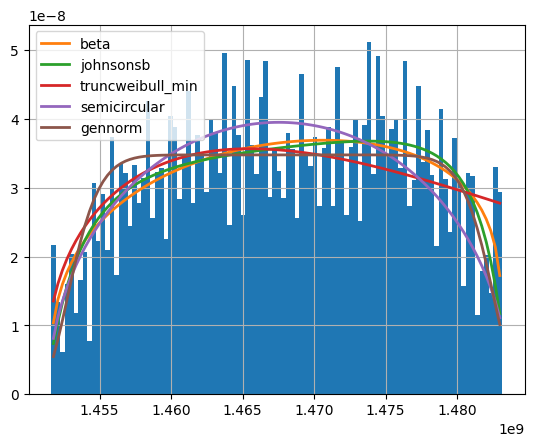

In [125]:
# Summary me muestra el resumen de los mejores ajustes
fdp_city_hotel_arrives_2016.summary(5)

In [126]:
# get_best me devuelve la mejor distribución de acuerdo al criterio que le indico y sus parámetros
fdp_city_hotel_arrives_2016.get_best(method='sumsquare_error')

{'beta': {'a': 1.3340086475855766,
  'b': 1.219853423871962,
  'loc': 1451532324.4767766,
  'scale': 31636621.34806298}}

In [127]:
fdp_city_hotel_arrives_2016.get_best(method='ks_statistic')

{'johnsonsb': {'a': -0.07927778936718151,
  'b': 0.7377228660032845,
  'loc': 1450974103.6452818,
  'scale': 32823406.726344213}}

##### 2017

In [128]:
# Preparar la columna del dataframe que se quiere ajustar
fdp_city_hotel_arrives_2017 = Fitter(yearly_dataframes[2017].arrival_date_timestamp)

In [129]:
# Con el método fit() ajusta mis datos a las 80 distribuciones de SciPy
fdp_city_hotel_arrives_2017.fit()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,1.864775e-14,3380.763494,3411.438856,0.042668,0.021475,9.082282e-07
powerlaw,1.898677e-14,3378.625366,3401.631888,0.043486,0.023356,6.295703e-08
vonmises_line,2.005234e-14,3378.090328,3401.096850,0.046455,0.048986,2.007077e-33
johnsonsb,2.108938e-14,3382.876908,3413.552270,0.048846,0.022591,1.916986e-07
uniform,2.216600e-14,3375.136136,3390.473817,0.053117,0.060865,2.228871e-51


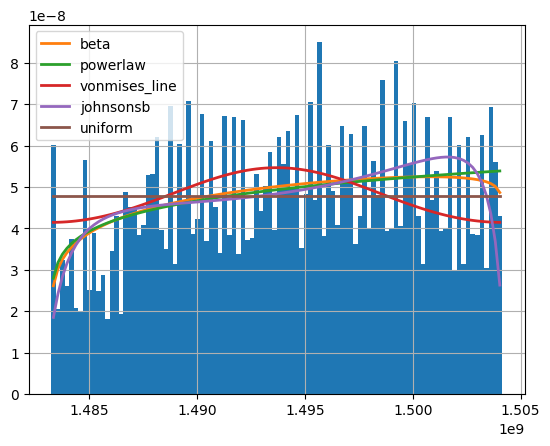

In [130]:
# Summary me muestra el resumen de los mejores ajustes
fdp_city_hotel_arrives_2017.summary(5)

In [131]:
# get_best me devuelve la mejor distribución de acuerdo al criterio que le indico y sus parámetros
fdp_city_hotel_arrives_2017.get_best(method='sumsquare_error')

{'beta': {'a': 1.1536103619480058,
  'b': 1.0293835847757524,
  'loc': 1483200045.1805675,
  'scale': 20939404.646501724}}

In [132]:
fdp_city_hotel_arrives_2017.get_best(method='ks_statistic')

{'beta': {'a': 1.1536103619480058,
  'b': 1.0293835847757524,
  'loc': 1483200045.1805675,
  'scale': 20939404.646501724}}

#### Simular valores

In [133]:
# Para simular, guardo los valores de los parámetros del 2016 que tiene mas registros
a= 1.3340086475855766,
b= 1.219853423871962,
loc= 1451532324.4767766,
scale= 31636621.34806298

In [134]:
# Gracias al método rvs del módulo stats de Scipy, puedo generar datos
# con los parámetros que me dio Fitter
fdp_f_arrival = stats.beta.rvs(a,b,loc,scale,size=100000).astype(int)

In [135]:
# Esta variable es un array de Numpy con valores similares a mis datos de origen
fdp_f_arrival

array([1461406876, 1472457811, 1471287763, ..., 1459295071, 1461433335,
       1481236188])

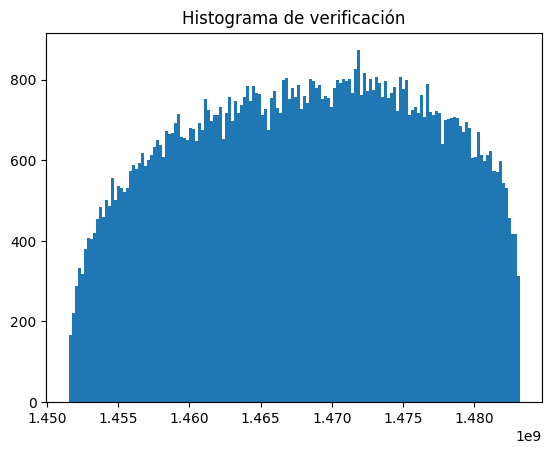

In [136]:
# Histograma de datos de verificación
plt.title("Histograma de verificación")
plt.hist(fdp_f_arrival, bins=150)
plt.show()

In [137]:
# Ordenar timestamps
sorted_arrival_timestamps = np.sort(fdp_f_arrival)

# Calcular las diferencias entre elementos consecutivos en fdp_f (en segundos)
differences_seconds = np.diff(sorted_arrival_timestamps)

# Convertir las diferencias a horas
differences_hours = differences_seconds / 3600  # Dividir por 60 segundos por minuto

# Imprimir o procesar las diferencias en minutos
differences_hours

array([1.44222222, 0.43944444, 0.13944444, ..., 0.86166667, 0.27944444,
       0.14277778])

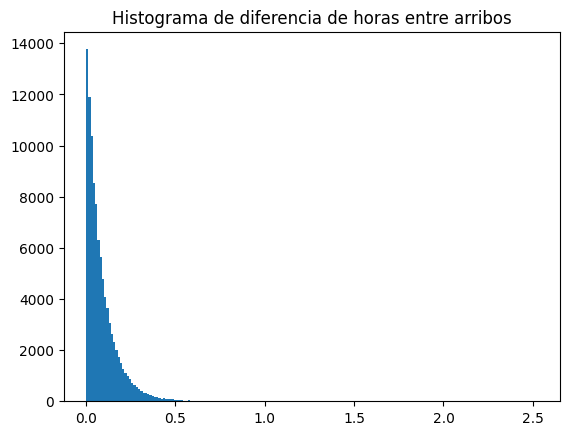

In [138]:
plt.title("Histograma de diferencia de horas entre arribos")
plt.hist(differences_hours, bins=200)
plt.show()

In [139]:
distributions_to_test = ['norm', 'expon', 'gamma', 'uniform']  # Example
# Preparar lo que se quiere ajustar
fdp_arrival_diff = Fitter(differences_hours,distributions=distributions_to_test)

# Con el método fit() ajusta mis datos a las 80 distribuciones de SciPy
fdp_arrival_diff.fit()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,0.123121,2389.986999,2409.012830,inf,0.010875,1.061803e-10
norm,73.560789,21531.176979,21550.202810,inf,0.173791,0.000000e+00
gamma,76.227586,378.255874,406.794621,inf,0.375084,0.000000e+00
uniform,212.845812,189.160184,208.186015,inf,0.846616,0.000000e+00


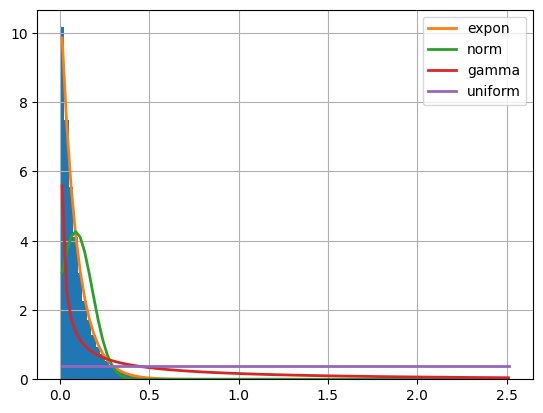

In [140]:
# Summary me muestra el resumen de los mejores ajustes
fdp_arrival_diff.summary(5)

In [141]:
# Obtener la que mejor ajusta con sus parametros
best_fit_params = fdp_arrival_diff.get_best(method='sumsquare_error')
best_fit_dist = list(best_fit_params.keys())[0]

In [142]:
print(best_fit_dist)
print(best_fit_params[best_fit_dist])
# Crear una distribucion utilizando los parametros
dist_object = getattr(stats, best_fit_dist)

# Generar numeros random
random_numbers = dist_object.rvs(**best_fit_params[best_fit_dist], size=30000)
random_numbers

expon
{'loc': 0.0, 'scale': 0.08786777589998121}


array([0.00784459, 0.01613045, 0.00530246, ..., 0.03437336, 0.04377315,
       0.05955931])

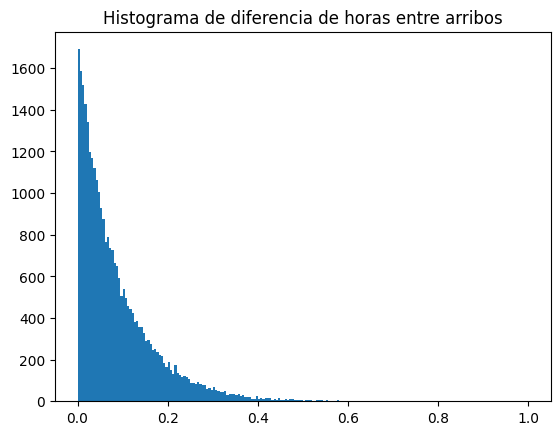

In [143]:
# Histograma de datos de verificación
plt.title("Histograma de diferencia de horas entre arribos")
plt.hist(random_numbers, bins=200)
plt.show()

### 5.3. Intervalo entre Arribos de Huéspedes

/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:6911: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:795: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:800: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))
/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:6911: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:795: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt

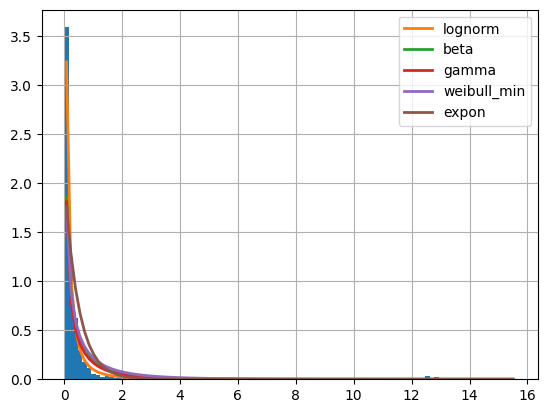

In [144]:
resultados_mensuales = {}
mejor_distribucion_fitter = {}
n_dias_simulados = 30
anio_base = 2025

for mes in range(1, 13):
    dist_mes = distribuciones_por_mes[distribuciones_por_mes['mes'] == mes]
    if dist_mes.empty:
        continue

    valores_arribos = dist_mes['n_arribos'].values
    probabilidades = dist_mes['frecuencia'].values

    arribos_por_dia_sim = np.random.choice(valores_arribos, size=n_dias_simulados, p=probabilidades)

    fecha_inicio_mes = datetime(anio_base, mes, 1)
    timestamps_mes = []

    for i, n_arribos in enumerate(arribos_por_dia_sim):
        fecha_base = fecha_inicio_mes + timedelta(days=i)
        for _ in range(n_arribos):
            hora = random.randint(8, 19)
            minuto = random.randint(0, 59)
            segundo = random.randint(0, 59)
            ts = datetime(fecha_base.year, fecha_base.month, fecha_base.day, hora, minuto, segundo)
            timestamps_mes.append(ts)

    timestamps_mes.sort()
    ts_series = pd.Series(timestamps_mes)
    intervals_sec = ts_series.diff().dropna().dt.total_seconds()
    intervals_hours = intervals_sec / 3600

    try:
      # Ajuste con fitter
      f = Fitter(intervals_hours, distributions=['gamma', 'weibull_min', 'expon', 'lognorm', 'beta'])
      f.fit()

      # Tomar nombre de mejor distribución del resumen ordenado por SSE
      f.summary()
      best_name = f.summary(5).index[4]

      # Obtener parámetros desde fitted_param (es confiable y siempre numérico)
      best_params_raw = f.fitted_param.get(best_name, ())
      best_params = tuple(round(float(p), 4) for p in best_params_raw if isinstance(p, (int, float, np.number)))

      mejor_distribucion_fitter[mes] = {
        'distribucion': best_name,
        'parametros': best_params
      }

      # Guardar también los ajustes manuales si los necesitás
      ajustes_manual = {
        'gamma': gamma.fit(intervals_hours),
        'weibull_min': weibull_min.fit(intervals_hours),
        'expon': expon.fit(intervals_hours),
        'lognorm': lognorm.fit(intervals_hours),
        'beta': beta.fit(intervals_hours)
      }

      resultados_mensuales[mes] = {
        'intervalos': intervals_hours,
        'ajustes': ajustes_manual
      }

    except Exception as e:
      print(f"[ERROR] Mes {mes}: {str(e)}")
      resultados_mensuales[mes] = {
        'intervalos': intervals_hours,
        'ajustes': None,
        'error': str(e)
      }


In [145]:
print("\nDistribución con mejor ajuste (según fitter) por mes:")
for mes in sorted(mejor_distribucion_fitter):
    info = mejor_distribucion_fitter[mes]
    print(f"Mes {mes}: {info['distribucion']} → parámetros: {info['parametros']}")




Distribución con mejor ajuste (según fitter) por mes:
Mes 1: expon → parámetros: (0.0, 0.6606)
Mes 2: expon → parámetros: (0.0, 0.4433)
Mes 3: gamma → parámetros: (0.1692, -0.0, 2.333)
Mes 4: gamma → parámetros: (0.1617, -0.0, 1.5294)
Mes 5: gamma → parámetros: (0.1448, -0.0, 2.3337)
Mes 6: gamma → parámetros: (0.1223, 0.0003, 5.4371)
Mes 7: weibull_min → parámetros: (0.6341, -0.0, 0.4913)
Mes 8: expon → parámetros: (0.0, 0.3949)
Mes 9: gamma → parámetros: (0.169, -0.0, 1.3598)
Mes 10: gamma → parámetros: (0.1615, -0.0, 2.3338)
Mes 11: gamma → parámetros: (0.1998, -0.0, 1.9065)
Mes 12: expon → parámetros: (0.0003, 0.4856)


{1: (0.6715, -0.0, 0.8358), 2: (0.6812, -0.0, 0.4569), 3: (0.7101, -0.0, 0.3305), 4: (0.7022, -0.0, 0.3092), 5: (0.6999, -0.0, 0.2681), 6: (0.6601, 0.0003, 0.3745), 7: (0.6341, -0.0, 0.4913), 8: (0.6977, -0.0, 0.3776), 9: (0.6751, -0.0, 0.3303), 10: (0.7056, -0.0, 0.311), 11: (0.6565, -0.0, 0.5172), 12: (0.6412, 0.0003, 0.5593)}


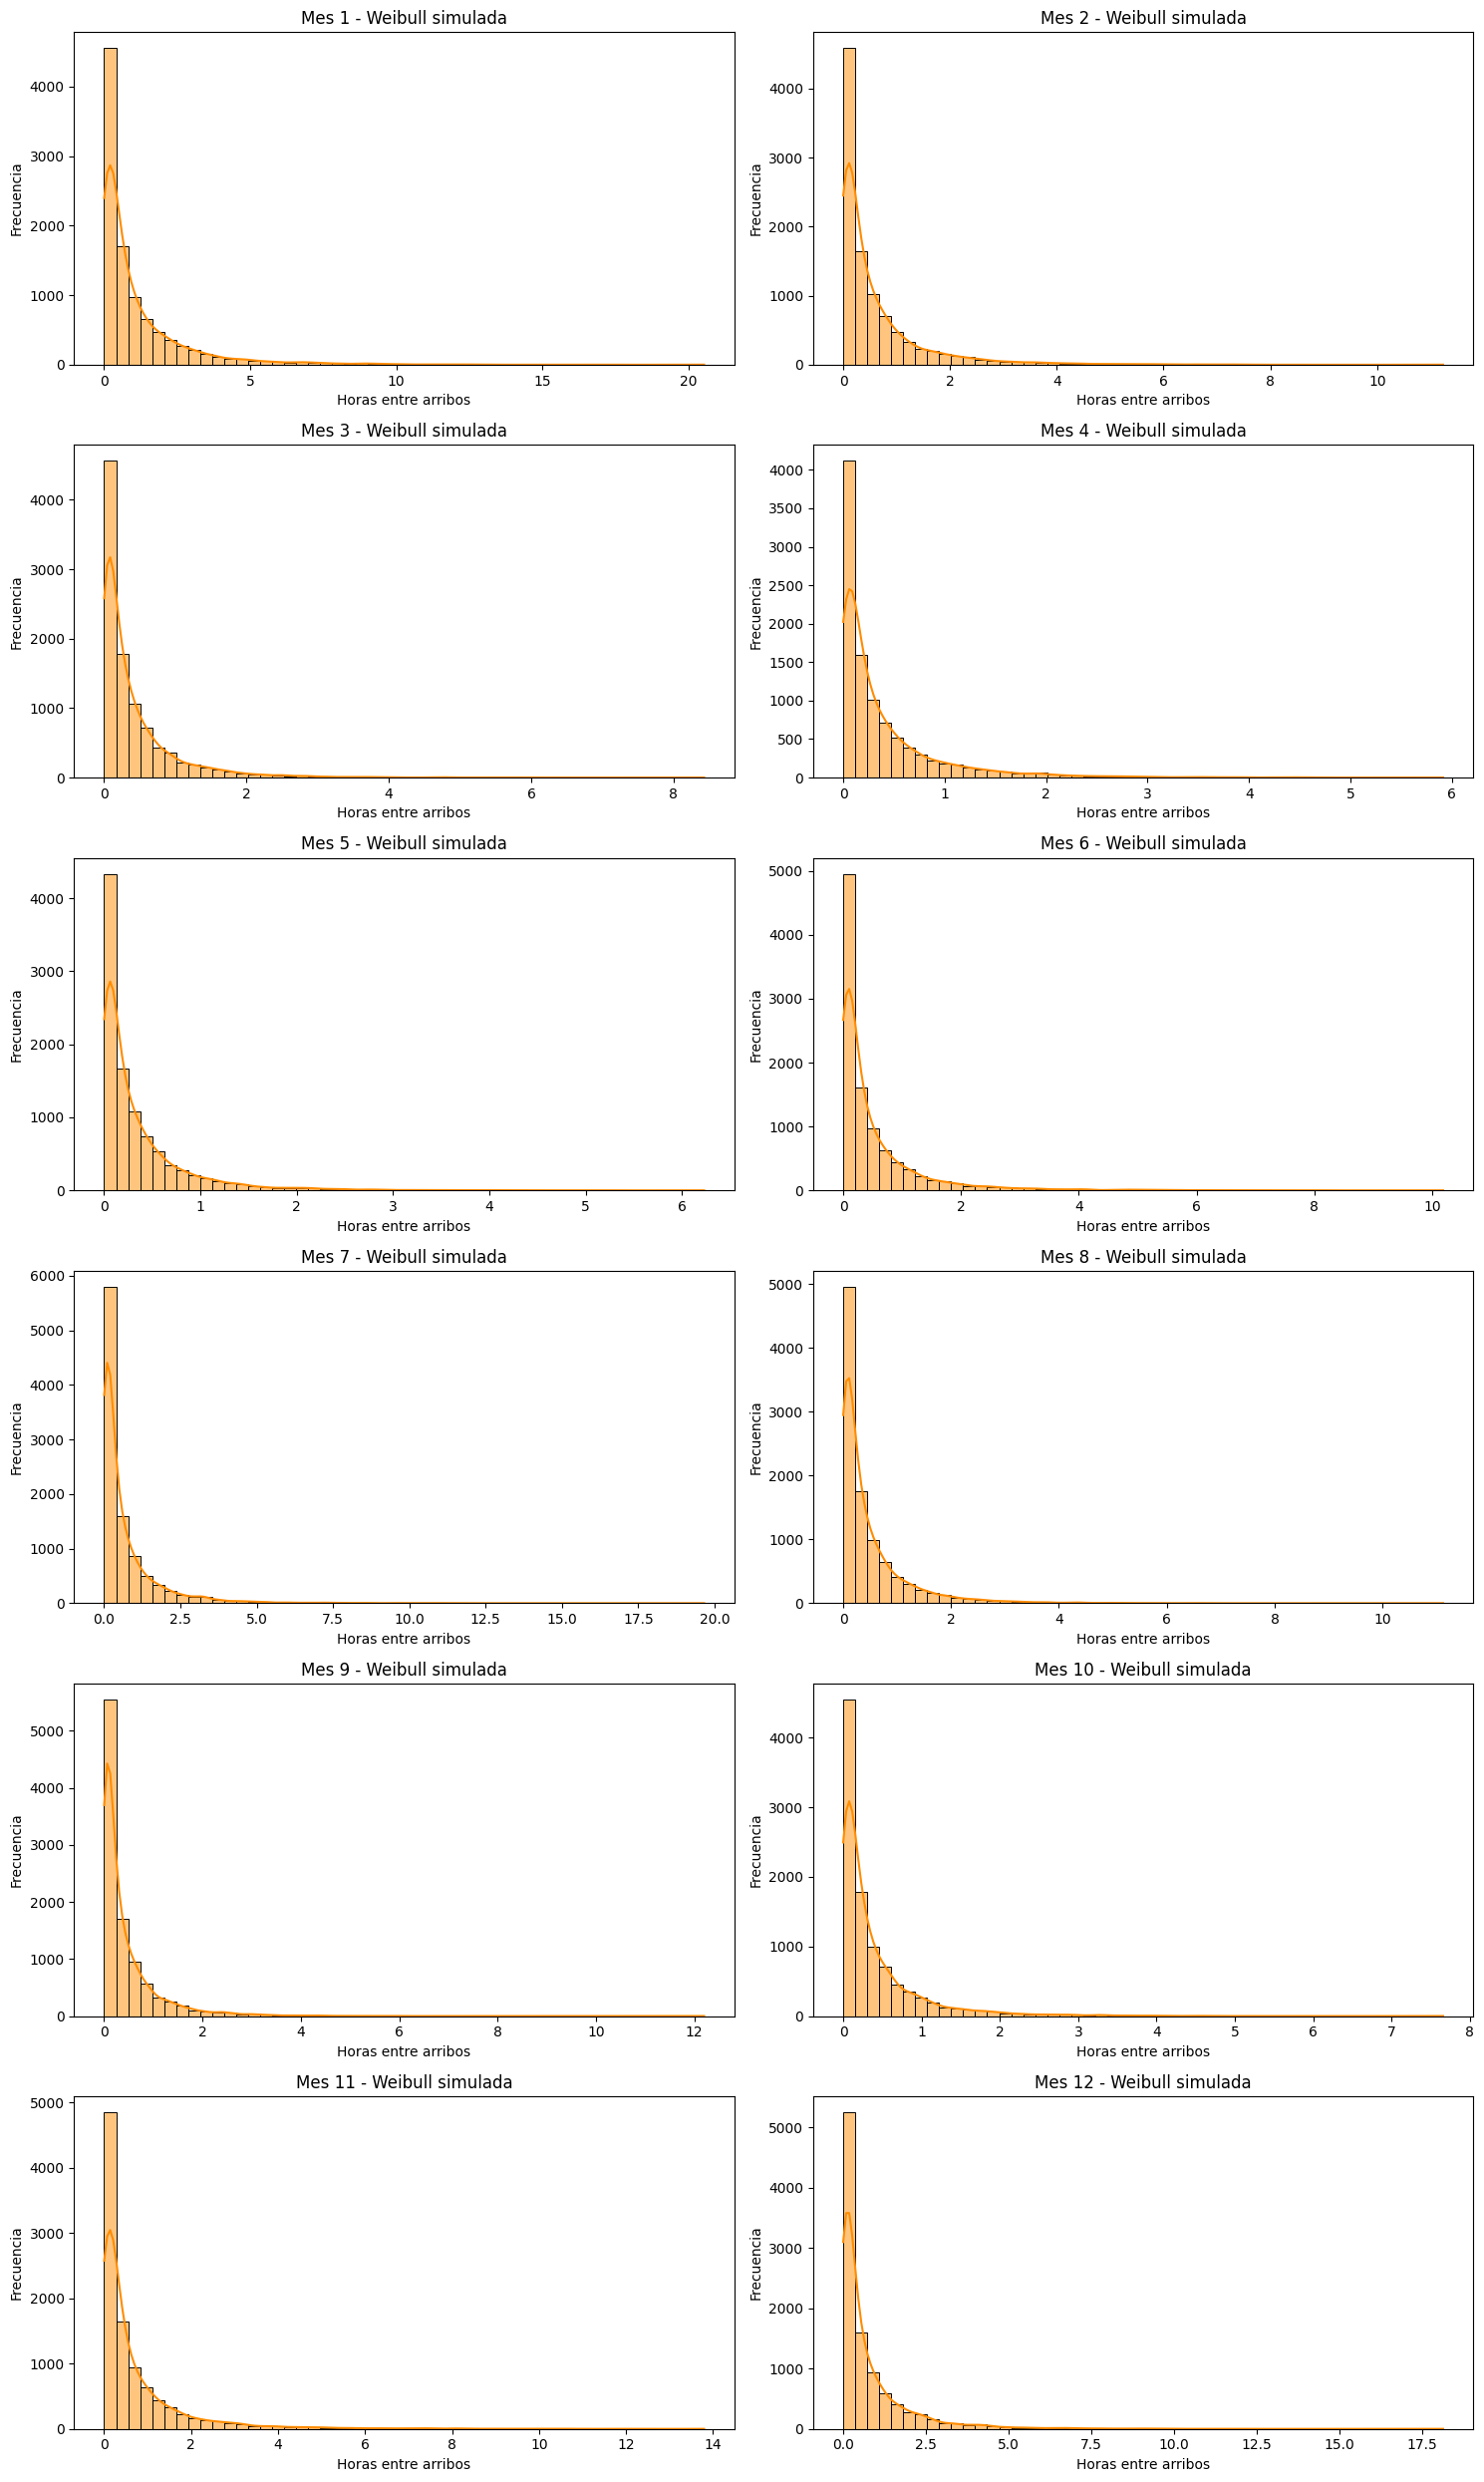

In [146]:
# Se elige Weibull_min
# Diccionario listo para simulación con Weibull
PARAMS_WEIBULL_POR_MES = {
    mes: tuple(round(p, 4) for p in ajuste['ajustes']['weibull_min'])
    for mes, ajuste in resultados_mensuales.items()
    if ajuste.get('ajustes') and 'weibull_min' in ajuste.get('ajustes')
}
print(PARAMS_WEIBULL_POR_MES)

# Graficar histograma de valores simulados con Weibull ajustada para cada mes
fig, axes = plt.subplots(6, 2, figsize=(15, 25))
axes = axes.flatten()

for i, mes in enumerate(sorted(PARAMS_WEIBULL_POR_MES.keys())):
    shape, loc, scale = PARAMS_WEIBULL_POR_MES[mes]
    simulados = weibull_min.rvs(shape, loc=loc, scale=scale, size=10000)

    ax = axes[i]
    sns.histplot(simulados, bins=50, kde=True, ax=ax, color='darkorange')
    ax.set_title(f"Mes {mes} - Weibull simulada")
    ax.set_xlabel("Horas entre arribos")
    ax.set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

### 5.2. Duración de la estadia

In [147]:
# Preparar la columna del dataframe que se quiere ajustar
fdp_city_hotel_stays = Fitter(bookings_city_hotel_stays.stays_total)

In [148]:
# Con el método fit() ajusta mis datos a las 80 distribuciones de SciPy
fdp_city_hotel_stays.fit()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
johnsonsb,46.710244,633.001463,667.889948,inf,0.449645,0.0
powerlaw,46.905020,619.877226,646.043590,inf,0.610980,0.0
chi,47.139836,530.656080,556.822444,inf,0.446646,0.0
erlang,47.311536,673.638485,699.804849,inf,0.618831,0.0
gamma,48.417818,621.420317,647.586681,inf,0.556992,0.0


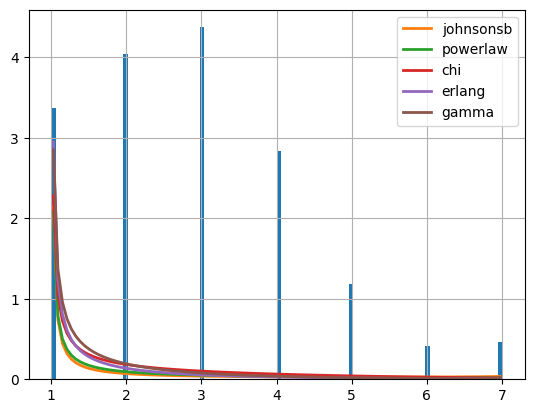

In [149]:
# Summary me muestra el resumen de los mejores ajustes
fdp_city_hotel_stays.summary(5)

In [150]:
# get_best me devuelve la mejor distribución de acuerdo al criterio que le indico y sus parámetros
fdp_city_hotel_stays.get_best(method='sumsquare_error')

{'johnsonsb': {'a': 0.6992142169649389,
  'b': 0.16475249315310017,
  'loc': 0.9999999999999999,
  'scale': 7.521564672170651}}

In [151]:
fdp_city_hotel_stays.get_best(method='ks_statistic')

{'vonmises_line': {'kappa': 1.4225484009241454,
  'loc': 2.708944573305667,
  'scale': 1.365885377776983}}

In [152]:
# Para simular, guardo los valores de los parámetros
c= 0.3510566987873381
loc= 2.9999999999999996
scale= 0.9263278639266157

In [153]:
# Gracias al método rvs del módulo stats de Scipy, puedo generar datos
# con los parámetros que me dio Fitter, asegurando valores positivos
fdp_f_stays = stats.dweibull.rvs(c, loc, scale=scale, size=100000).astype(int)
fdp_f_stays = np.clip(fdp_f_stays, 1, 8) # Truncar valores a 0-8

In [154]:
fdp_f_stays

array([4, 3, 2, ..., 1, 2, 2])

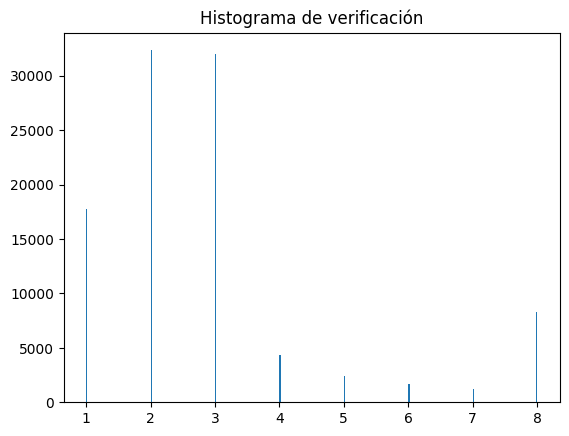

In [155]:
# Histograma de datos de verificación
plt.title("Histograma de verificación")
plt.hist(fdp_f_stays, bins=350)
plt.show()